In [1]:
from examtoolbox import *

# Variance Models

In [4]:
n_experiments = 100
n_trials = 50
mu_s = 1
mu_s0 = 0
sigma_s = 1
sigma_s0 = 1
equl_var = Variance_Model(n_experiments, n_trials, mu_s, mu_s0, sigma_s, sigma_s0)
un_equl_var = Variance_Model(n_experiments, n_trials, mu_s, mu_s0, 0.8, sigma_s0)

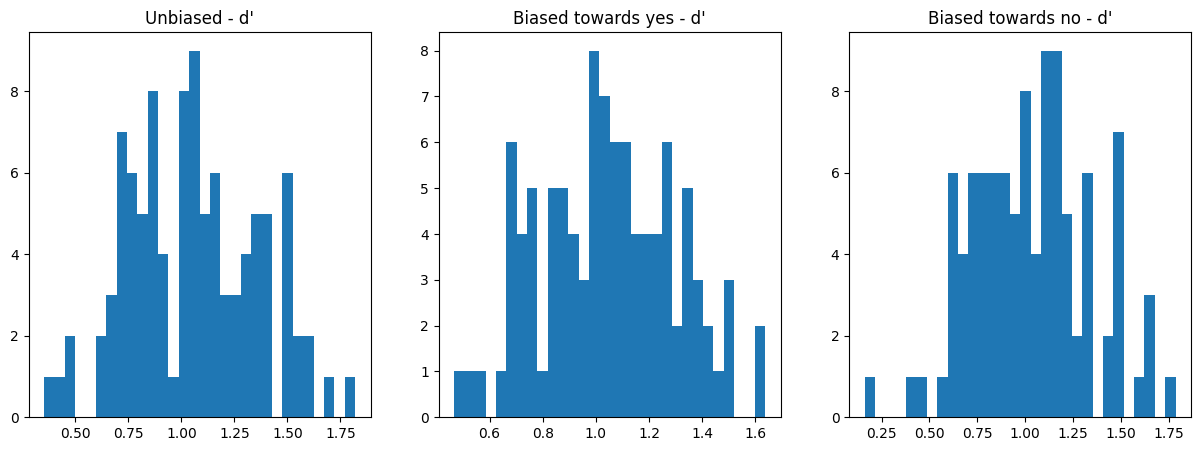

The d prime for the unbiased criterion: 1.0558152086506525
The d prime for the biased towards yes criterion: 1.0480522557602152
The d prime for the biased towards no criterion: 1.0339444026807816


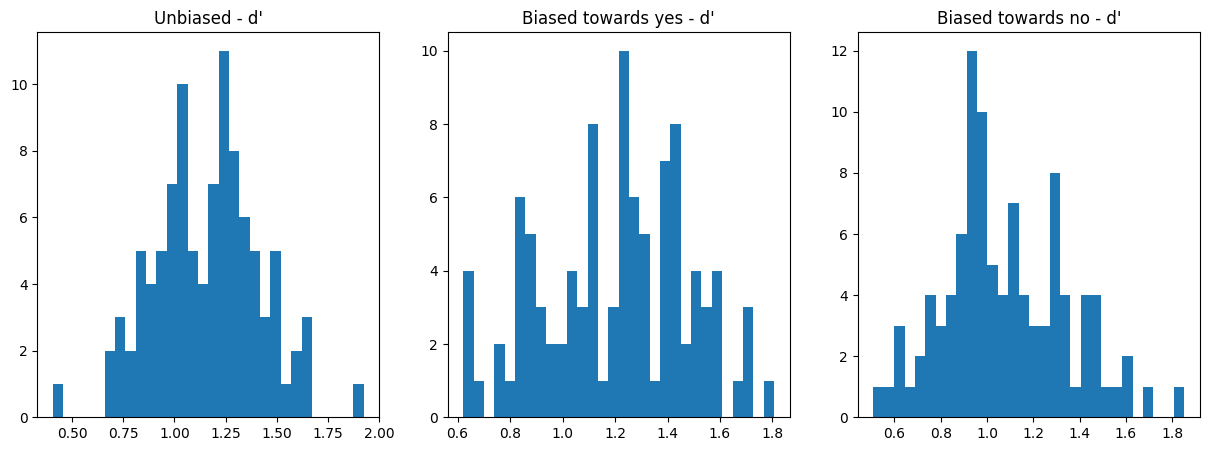

The d prime for the unbiased criterion: 1.1586904618912441
The d prime for the biased towards yes criterion: 1.202178509402782
The d prime for the biased towards no criterion: 1.0809013392716647


In [5]:
cs = [0.5, 0.3, 0.7]
equl_var.plot_histogram(cs)
un_equl_var.plot_histogram(cs)

# Psychometric functions

In [2]:
number_of_trials = 30
stimulus_intensity = np.array([5, 10, 15, 20, 25, 30])
number_of_correct_responses = np.array([12, 11, 19, 27, 30, 30])

# Create a new model
model = PsychoMetric(stimulus_intensity, number_of_correct_responses, number_of_trials, p_guess=1/3)

In [3]:
model.print_parameters([15, 5], "psycho")
model.print_parameters([15, 5], "HT")

c =  10.131849003731983
sigma =  8.190826475506526
Negative log likelihood =  11.315347372636985
c =  15.692027691293188
sigma =  3.7780834209478726
Negative log likelihood =  7.637350852186732


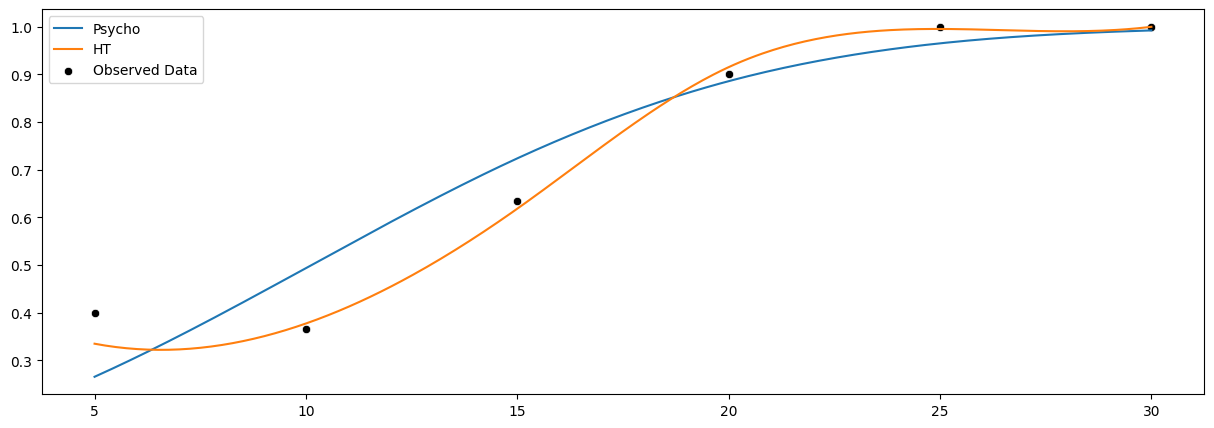

In [4]:
model.plot_psycho([15, 5])

# Magnitude Estimation

Optimal Weber fraction 0.19980887890008203
I0: 0.15559519612133466


/Users/gustavlarsen/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Uni/Cognitive Modelling/02458_Cognitive_Modelling/Exam/examtoolbox.py:136: RuntimeWarning: invalid value encountered in log
  return (1/c)*np.log(i_s/I0)


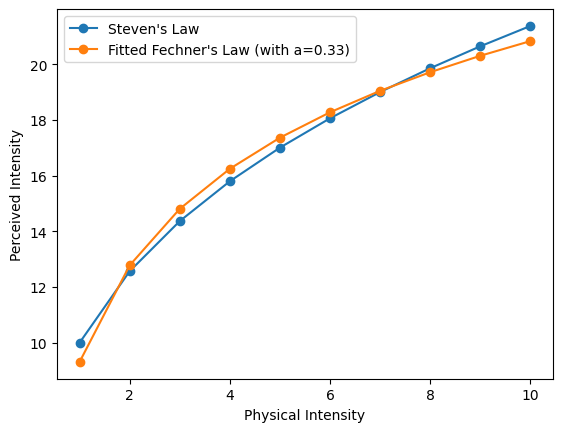

In [2]:
model = MagnitudeEsimation(10, 0.33)
model.print_fit()

Optimal Weber fraction 0.00013132317238284192
I0: 2.0418488472369387


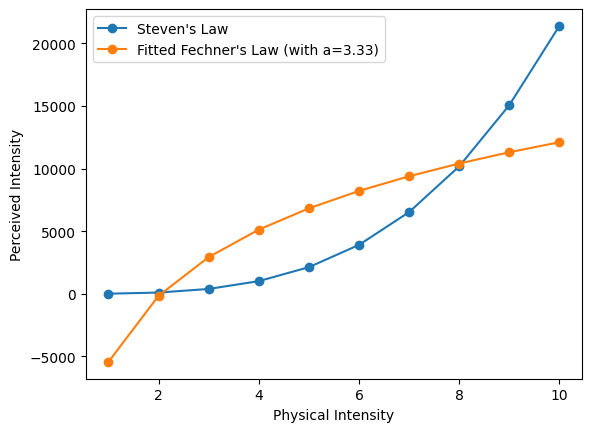

In [3]:
model = MagnitudeEsimation(10, 3.33)
model.print_fit()